1. Load dataset 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    "animal_samples/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_data = datagen.flow_from_directory(
    "animal_samples/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 24 images belonging to 8 classes.
Found 24 images belonging to 8 classes.


️2. Load Pretrained MobileNet (Without Top Layer)

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    weights="imagenet",      # pretrained on ImageNet
    include_top=False,       # remove original classifier
    input_shape=(128, 128, 3)
)

️3. Freeze the Base Model (Feature Extraction)

In [4]:
for layer in base_model.layers:
    layer.trainable = False

️4. Add Custom Classification Head

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_data.num_classes, activation="softmax")
])

️5. Compile the Model

In [7]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

6. Train the Transfer Learning Model

In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1250 - loss: 3.0312 - val_accuracy: 0.5833 - val_loss: 1.6648
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.3333 - loss: 2.0117 - val_accuracy: 0.7917 - val_loss: 1.0337
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.5000 - loss: 1.3839 - val_accuracy: 0.8750 - val_loss: 0.6419
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.7500 - loss: 0.8819 - val_accuracy: 0.9583 - val_loss: 0.4024
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.6667 - loss: 0.8069 - val_accuracy: 1.0000 - val_loss: 0.2542
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.9167 - loss: 0.5011 - val_accuracy: 1.0000 - val_loss: 0.1655
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.9167 - loss: 0.3026 - val_accuracy: 1.0000 - val_loss: 0.1085
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.9583 - loss: 0.2395 - val_accuracy: 1.0000 - val_loss: 0.

7.Visualization

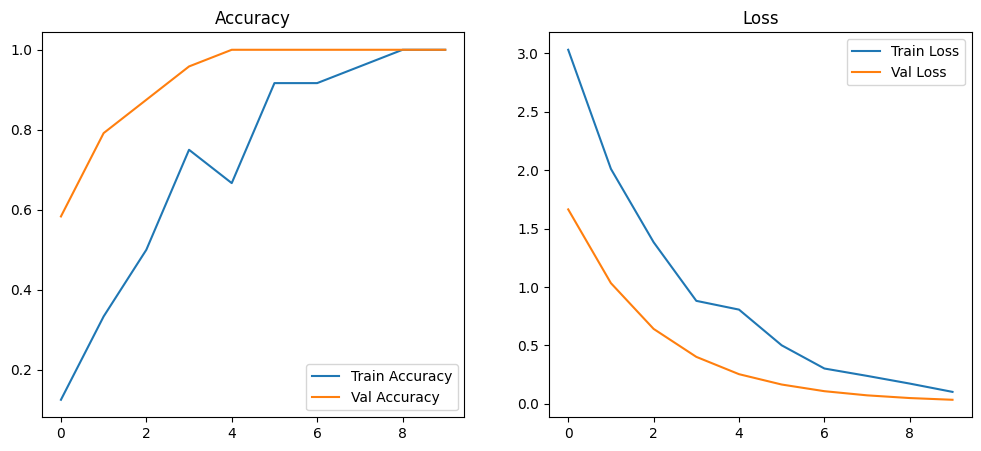

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

#Accuracy graph

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Val Accuracy")
plt.title("Accuracy")
plt.legend()

#Loss graph

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Val Loss")
plt.title("Loss")
plt.legend()

plt.show()